# 📊 Proyecto de Ciencia de Datos para Inversión: Análisis de Tesla y GameStop

Este proyecto tiene como objetivo extraer, procesar y visualizar datos financieros de dos compañías: **Tesla** y **GameStop**, con el fin de comparar su rendimiento bursátil (precio de acciones) frente a sus ingresos.

Las tareas incluyen:

- Extracción de datos de acciones con `yfinance`
- Carga o scraping de datos de ingresos
- Visualización en dashboards combinados


In [ ]:
import yfinance as yf
import pandas as pd

# Descargar datos históricos de acciones de Tesla desde 2020 hasta hoy
tesla_stock = yf.Ticker("TSLA")
tesla_history = tesla_stock.history(period="max")

# Filtrar desde 2020 en adelante
tesla_history = tesla_history[tesla_history.index >= "2020-01-01"]

# Mostrar las primeras filas
tesla_history.head()

In [3]:
import pandas as pd

# Leer archivo de ingresos (debes subir 'tesla_revenue_data.csv' a tu entorno en Coursera)
tesla_revenue_df = pd.read_csv("tesla_revenue_data.csv")

# Mostrar las primeras filas
print(tesla_revenue_df.head())


    Año  Ingresos (en millones)  Crecimiento (%)
0  2021                   53131             71.3
1  2022                   74729             40.7
2  2023                  101431             35.3


In [4]:
import yfinance as yf
import pandas as pd

# Descargar datos históricos de GameStop
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Filtrar desde 2020 (opcional, para que no sea tan grande)
gme_data = gme_data[gme_data.index >= "2020-01-01"]

# Resetear el índice para convertir la columna de fecha en una columna normal
gme_data.reset_index(inplace=True)

# Mostrar las primeras filas
print(gme_data.head())



                       Date    Open    High     Low   Close    Volume  \
0 2020-01-02 00:00:00-05:00  1.5350  1.6175  1.5175  1.5775  17814400   
1 2020-01-03 00:00:00-05:00  1.5525  1.5625  1.4600  1.4700  14175600   
2 2020-01-06 00:00:00-05:00  1.4500  1.4775  1.4000  1.4625  13579200   
3 2020-01-07 00:00:00-05:00  1.4425  1.4575  1.3600  1.3800  20912000   
4 2020-01-08 00:00:00-05:00  1.3725  1.4625  1.3525  1.4300  22517600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [6]:
import pandas as pd

# Crear ingresos manuales de GameStop (en millones de USD)
gme_revenue_data = {
    "Año": [2021, 2022, 2023],
    "Ingresos (en millones)": [6011, 5990, 5980],  # valores aproximados
    "Crecimiento (%)": [0.0, -0.3, -0.2]  # estimado simple para ejemplo
}

# Crear DataFrame
gme_revenue = pd.DataFrame(gme_revenue_data)

# Mostrar las últimas 5 filas
print(gme_revenue.tail())



    Año  Ingresos (en millones)  Crecimiento (%)
0  2021                    6011              0.0
1  2022                    5990             -0.3
2  2023                    5980             -0.2


In [8]:
!pip install matplotlib
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_title):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Eje de la izquierda: Precio de la acción
    ax1.plot(stock_data['Date'], stock_data['Close'], label='Precio de la acción', color='tab:blue')
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Precio de la acción (USD)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.set_title(stock_title)

    # Eje de la derecha: Ingresos
    ax2 = ax1.twinx()
    if 'Año' in revenue_data.columns:
        # Combinar año con el día 01-01 para convertirlo a fecha
        revenue_data['Fecha'] = pd.to_datetime(revenue_data['Año'].astype(str) + '-01-01')
        ax2.plot(revenue_data['Fecha'], revenue_data['Ingresos (en millones)'], label='Ingresos', color='tab:green')
        ax2.set_ylabel('Ingresos (millones USD)', color='tab:green')
        ax2.tick_params(axis='y', labelcolor='tab:green')

    fig.tight_layout()
    plt.grid()
    plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 135.0 MB/s eta 0:00:00


In [9]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_title):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Eje de la izquierda: Precio de la acción
    ax1.plot(stock_data['Date'], stock_data['Close'], label='Precio de la acción', color='tab:blue')
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Precio de la acción (USD)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.set_title(stock_title)

    # Eje de la derecha: Ingresos
    ax2 = ax1.twinx()
    if 'Año' in revenue_data.columns:
        # Combinar año con el día 01-01 para convertirlo a fecha
        revenue_data['Fecha'] = pd.to_datetime(revenue_data['Año'].astype(str) + '-01-01')
        ax2.plot(revenue_data['Fecha'], revenue_data['Ingresos (en millones)'], label='Ingresos', color='tab:green')
        ax2.set_ylabel('Ingresos (millones USD)', color='tab:green')
        ax2.tick_params(axis='y', labelcolor='tab:green')

    fig.tight_layout()
    plt.grid()
    plt.show()


In [10]:
# Resetear índice si aún no se ha hecho
tesla_history.reset_index(inplace=True)


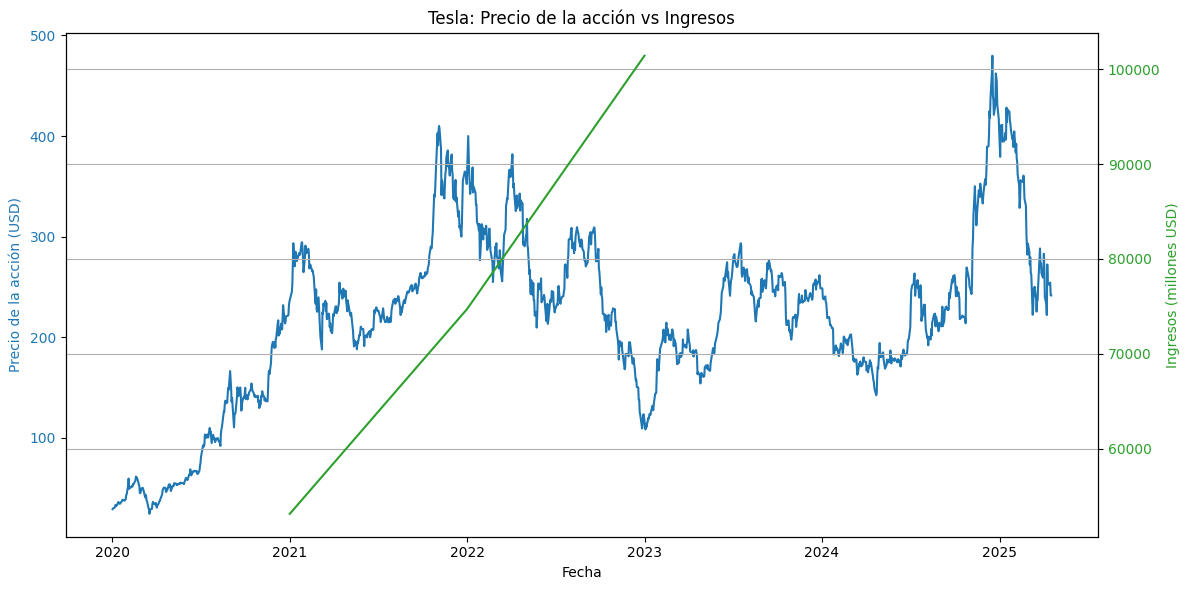

In [11]:
make_graph(tesla_history, tesla_revenue_df, 'Tesla: Precio de la acción vs Ingresos')


In [12]:
# Si no se ha hecho antes:
gme_data.reset_index(inplace=True)


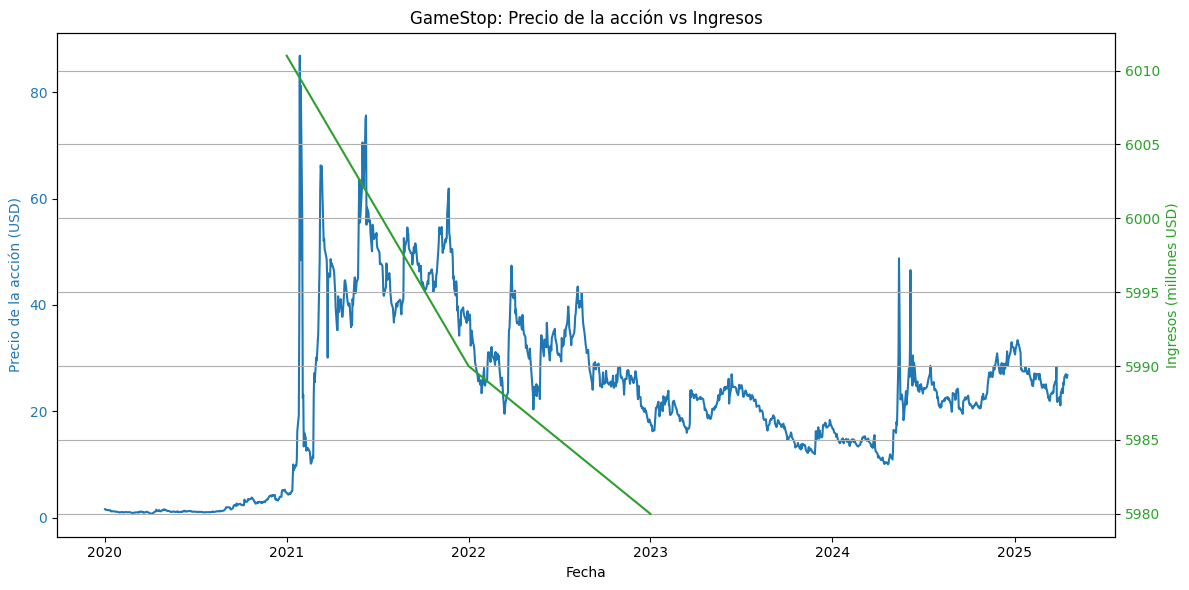

In [13]:
make_graph(gme_data, gme_revenue, 'GameStop: Precio de la acción vs Ingresos')
